<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 1</h2>

### Student names and numbers:
Raluca-Elena Petrovici 279998
Zoltan Vegh 280032
Mate Sebestyen 279960
Haralambi Nikolaev Tomovski 280018

The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For most of the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

In [35]:
# Import all necessary libraries here
%matplotlib inline 
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn # for visualizations

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Exercise 1: Decision trees

In this exercise we investigate the Boston Housing dataset, which we treat as a classification problem:

In [36]:
from sklearn.datasets import load_boston
data = load_boston()

import numpy as np
from sklearn.model_selection import train_test_split
c = np.array([1 if y > np.median(data['target']) else 0 for y in data['target']])
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)

In [37]:
def visualization(model, should_print):
    tree.fit(X_train, c_train)
    if should_print:
        print("Training data: {}".format(tree.score(X_train, c_train)))
        print("Testing data: {}".format(tree.score(X_test, c_test)))    
    dot_data = export_graphviz(tree, out_file=None, feature_names=data.feature_names, filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"6,5!"')
    gvz_graph = graphviz.Source(pydot_graph.to_string())
    return gvz_graph

The so-called 'visualization' is a helper function, to display trees later-on.

### Model learning
**a)** Learn a decision tree using the training data and evaluate its performance on both the training data and the test data. Generate random training/test partitions or varying sizes and analyze how the accuracy results vary (consult the documentation for `train_test_split(.)`).

In [38]:
print("The keys of the object: {}".format(data.keys()))
#print(data['DESCR'][:3000])
print(data['feature_names'][:100])

The keys of the object: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


By reading the description of the boston dataset, we conclude that the MEDV property (Median value of the houses) is the target value.

In [39]:
dataSet = pd.DataFrame(data.data,columns = data.feature_names)
dataSet['MEDV'] = data.target #MEDV is the target price
dataSet.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Having displayed the first few lines of the dataset (including the target) provides a great idea about the data.

In [40]:
tree = DecisionTreeClassifier(random_state=0)
for i in range(1, 10):    
    X_train, X_test, c_train, c_test = train_test_split(data['data'], c, test_size=i/10, random_state=0)  
    tree.fit(X_train, c_train)
    print("   Testing score with test_size", i/10, ": {}".format(tree.score(X_test, c_test)))

   Testing score with test_size 0.1 : 0.7254901960784313
   Testing score with test_size 0.2 : 0.803921568627451
   Testing score with test_size 0.3 : 0.7960526315789473
   Testing score with test_size 0.4 : 0.7881773399014779
   Testing score with test_size 0.5 : 0.8102766798418972
   Testing score with test_size 0.6 : 0.8256578947368421
   Testing score with test_size 0.7 : 0.8253521126760563
   Testing score with test_size 0.8 : 0.8148148148148148
   Testing score with test_size 0.9 : 0.8114035087719298


Examining the scores of the trees that have been created with different test sizes, it can be seen that the accuracy ate naturally remains in a certain range and does not vary significantly. In the given dataset, around 0.6-0.7 proportion of the original data provides the highest accuracy.

In [41]:
tree = DecisionTreeClassifier(random_state=0)
for i in range(1, 10):    
    X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=i*10)    
    tree.fit(X_train, c_train)
    print("   Testing score with random_state", i*10, ": {}".format(tree.score(X_test, c_test)))

   Testing score with random_state 10 : 0.7952755905511811
   Testing score with random_state 20 : 0.8346456692913385
   Testing score with random_state 30 : 0.8110236220472441
   Testing score with random_state 40 : 0.8503937007874016
   Testing score with random_state 50 : 0.8346456692913385
   Testing score with random_state 60 : 0.889763779527559
   Testing score with random_state 70 : 0.8582677165354331
   Testing score with random_state 80 : 0.8346456692913385
   Testing score with random_state 90 : 0.8582677165354331


On the random-state's side however, there is a bigger margin between the endpoints, for the same reasons as in the test_size scenarios, the results stay in a range. By providing different random states to the train_test_split function, we can control how the dataset shall be shuffled before the splitting is applied. Since we are talking about randomized scenarios, relying on the random data might not necessarily help finding the best solution. The accuracy peaks when the state is set to 60, whilst the state 10 performs the worst.

### Model analysis

**b)** Display the decision tree learned using the training data.

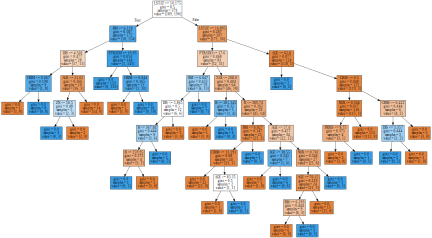

In [42]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
tree = DecisionTreeClassifier(random_state=0)
visualization(tree, False)

Having a tree with default test size and random-state 0, results in a highly overfitted graph. For avoiding such overfit, pre-pruning the tree is used, meaning that the max-depth is limited.

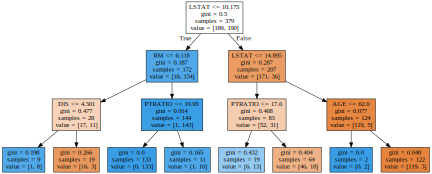

In [43]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
visualization(tree, False)

**c)** What are the most important features as determined by the learned tree and does, e.g., the choice of top node seem reasonable to you?

The root node of the generate tree is based on the LSTAT feature. LSTAT represents the homeowners status financially (in percentage), with other words whether they are considered lower class or not. Such a factor appearing in the top node shall not be considered surprising. Only by logic, we can conclude that lower class homeowners lower the demand for houses, therefore indirectly causing the house prices to decrease. For further evaulating the results of the tree, it is essential to check on the importances of the features:

**d)** How does the features deemed most important by the decision tree learner match the generated tree and your understanding of house prices?

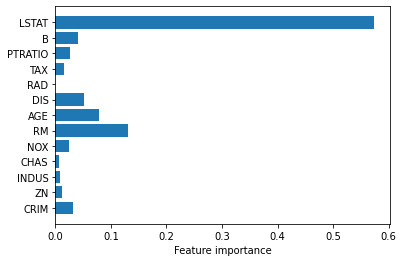

In [44]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, c_train)
def importance(model):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
importance(tree)

The following diagram representing the importances of the features, supports the results of the tree. The LSTAT feature is followed by the RM, which represents the average number of room per building. It is important to note the age (unit built prior 1940) and DIS (distance to employment centers in Boston), which are the other most important features.

### Model complexity

**e)** Try controlling the complexity of the learned decision tree by adjusting the parameters max\_depth, min\_samples\_split, min\_samples\_leaf

In [45]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
for i in range(1, 10):  
    if i == 9: print("No maximum depth set (Equalent to max_depth=9)")
    else: print("Accuracy on max_depth:", i)    
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(X_train, c_train)
    print("   Training data: {}".format(tree.score(X_train, c_train)))
    print("   Testing data: {}".format(tree.score(X_test, c_test)))

Accuracy on max_depth: 1
   Training data: 0.8575197889182058
   Testing data: 0.7637795275590551
Accuracy on max_depth: 2
   Training data: 0.8733509234828496
   Testing data: 0.7874015748031497
Accuracy on max_depth: 3
   Training data: 0.9155672823218998
   Testing data: 0.7637795275590551
Accuracy on max_depth: 4
   Training data: 0.9313984168865436
   Testing data: 0.7716535433070866
Accuracy on max_depth: 5
   Training data: 0.9498680738786279
   Testing data: 0.7952755905511811
Accuracy on max_depth: 6
   Training data: 0.9762532981530343
   Testing data: 0.7716535433070866
Accuracy on max_depth: 7
   Training data: 0.9894459102902374
   Testing data: 0.7795275590551181
Accuracy on max_depth: 8
   Training data: 0.9920844327176781
   Testing data: 0.7952755905511811
No maximum depth set (Equalent to max_depth=9)
   Training data: 1.0
   Testing data: 0.8031496062992126


In the given database, constructing trees with alternative maximum-depth values does not lead to a substantial improvement in accuracy. In the case of the testing data, the range of score-values is between 76 and 81 percent. Given the increasing overfitting of the tree as the depth grows, such a little range in the scores is great. Even with such a 'small' dataset, achieving 100% accuracy with the training data and gaining 1-2 percent accuracy with the testing data is not worth the processing power, due to the overfitting of the tree.

Before executing tests with different min_samples_split and min_samples_leaf setups, it is important to understand their working:

The min_samples_split defines the minimum sample amount, that each inner node (not leaf) should have before splitting. Logically, the higher the amount is, the smaller the tree will be, since the data is separated in less nodes. Oppositionally, with min_samples_leaf, the amount of samples in the leaf node can be defined. The higher the value is, the sooner the parent nood shall split. Naturally, if a node does not have at least twice the size of the min_samples_leaf amount, it shall not separate, and become a leaf.

In case of having both the min_samples_split and min_samples_leaf values set to such an amount that they interfere with each other, the minimum samples in the leaf node have the advantage and gets guaranteed, regardless of the min_samples_split

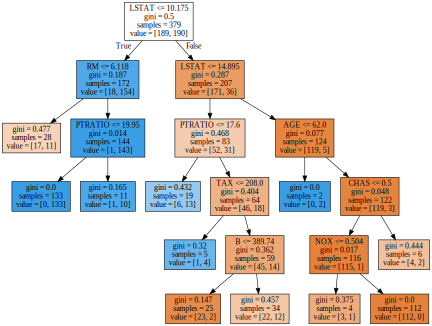

In [46]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
tree = DecisionTreeClassifier(min_samples_split=40, random_state=0)
visualization(tree, False)

Usually the min_samples_split lies between 1 and 40 (for the CART algorithm). For the sake of presentation, 40 has been used. As it can be seen, the size of the original tree is shortened, therefore it can be concluded that by incrementing the amount of samples in the inner-nodes, we can avoid overfitting. This charasteristic of the property, gives the possibility to tune the tree.

In [47]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
for i in range(1, 10):  
    print("Accuracy on min_samples_split:", i*10)    
    tree = DecisionTreeClassifier(min_samples_split=i*10, random_state=0)
    tree.fit(X_train, c_train)
    print("   Training data: {}".format(tree.score(X_train, c_train)))
    print("   Testing data: {}".format(tree.score(X_test, c_test)))

Accuracy on min_samples_split: 10
   Training data: 0.9604221635883905
   Testing data: 0.7559055118110236
Accuracy on min_samples_split: 20
   Training data: 0.9472295514511874
   Testing data: 0.7480314960629921
Accuracy on min_samples_split: 30
   Training data: 0.9182058047493403
   Testing data: 0.7795275590551181
Accuracy on min_samples_split: 40
   Training data: 0.9050131926121372
   Testing data: 0.7952755905511811
Accuracy on min_samples_split: 50
   Training data: 0.9050131926121372
   Testing data: 0.7952755905511811
Accuracy on min_samples_split: 60
   Training data: 0.9050131926121372
   Testing data: 0.7952755905511811
Accuracy on min_samples_split: 70
   Training data: 0.8970976253298153
   Testing data: 0.7952755905511811
Accuracy on min_samples_split: 80
   Training data: 0.8970976253298153
   Testing data: 0.7952755905511811
Accuracy on min_samples_split: 90
   Training data: 0.8786279683377308
   Testing data: 0.7874015748031497


By testing the tree with different min_samples_split values, the most optimal setup can be found, which provides great accuracy, without over or underfitting structure. As it can be seen above, in some cases from the sample size 40, the accuracy doesn't change at all for a while. Considering the size of the dataSet, and by evaulating the results, 40 might be an ideal number to use, since it does not cause underfitting yet, whilst provides great accuracy.

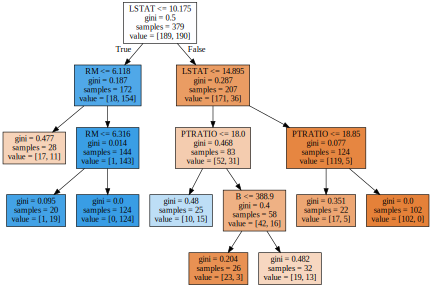

In [48]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
visualization(tree, False)

Min_samples_leaf can be used for generally the same reason, pre-pruning. Normally, (CART algorithm) its value shall lie between 1 and 20. This attribute like min samples split, assures that many samples inform the decisions in the tree by determining which splits will be accounted.

In [49]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
for i in range(1, 10):  
    print("Accuracy on min_samples_leaf:", i*2)    
    tree = DecisionTreeClassifier(min_samples_leaf=i*2, random_state=0)
    tree.fit(X_train, c_train)
    print("   Training data: {}".format(tree.score(X_train, c_train)))
    print("   Testing data: {}".format(tree.score(X_test, c_test)))

Accuracy on min_samples_leaf: 2
   Training data: 0.9815303430079155
   Testing data: 0.7874015748031497
Accuracy on min_samples_leaf: 4
   Training data: 0.9551451187335093
   Testing data: 0.7401574803149606
Accuracy on min_samples_leaf: 6
   Training data: 0.9366754617414248
   Testing data: 0.7559055118110236
Accuracy on min_samples_leaf: 8
   Training data: 0.9261213720316622
   Testing data: 0.7086614173228346
Accuracy on min_samples_leaf: 10
   Training data: 0.9182058047493403
   Testing data: 0.7401574803149606
Accuracy on min_samples_leaf: 12
   Training data: 0.9129287598944591
   Testing data: 0.7874015748031497
Accuracy on min_samples_leaf: 14
   Training data: 0.9023746701846965
   Testing data: 0.8110236220472441
Accuracy on min_samples_leaf: 16
   Training data: 0.8918205804749341
   Testing data: 0.7952755905511811
Accuracy on min_samples_leaf: 18
   Training data: 0.8918205804749341
   Testing data: 0.7952755905511811


In the tested scenarios, min_samples_leaf: 16 has been providing the highest accuracy.

**f)** Investigate the effect when changing these parameters: - Visualize (some of) the trees - Evaluate the performance of the models on both the training data and the test data

Training data: 0.8575197889182058
Testing data: 0.7637795275590551


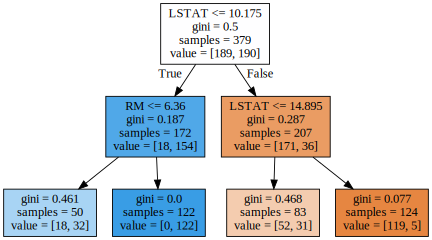

In [50]:
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)
tree = DecisionTreeClassifier(random_state=0, min_samples_leaf = 50, min_samples_split=100, max_depth=2)
visualization(tree, True)

Training data: 0.8733509234828496
Testing data: 0.7874015748031497


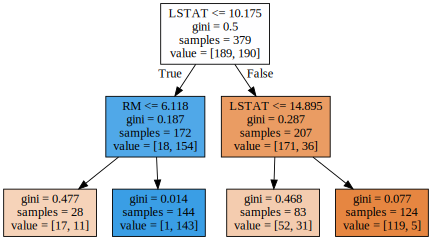

In [51]:
tree = DecisionTreeClassifier(random_state=0, min_samples_leaf = 2, min_samples_split=2, max_depth=2)
visualization(tree, True)

Training data: 0.9076517150395779
Testing data: 0.7637795275590551


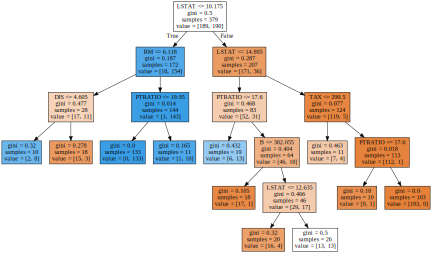

In [52]:
tree = DecisionTreeClassifier(random_state=0, min_samples_leaf = 10, min_samples_split=20, max_depth=5)
visualization(tree, True) 

Training data: 0.9023746701846965
Testing data: 0.8110236220472441


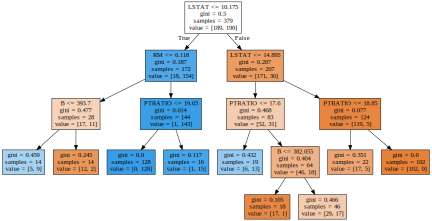

In [53]:
tree = DecisionTreeClassifier(random_state=0, min_samples_leaf = 14, min_samples_split=20, max_depth=4)
visualization(tree, True)

After creating a few trees with extremist parameters, it is clear that staying between the boundaries, suggested by the documentations. The testing data reached its highest, when reasonable and suggested parameters have been assigned to the tree (last scenario). In all cases, the initial dataset has been split with a random_state = 0, ensuring the results strictly based on the parameters, not on luck.

Overall, it is important to note, that the obtained results in almost every cases and scenarios in the previous exercises have lied between a small range. This pattern is originated from the size of the original dataSet. 506 instances consist the dataSet, and the items also not differ in a significant manner, causing such a similar score.

**f)** Try to find good parameter values using cross-validation. How does the obtained parameters match your manual investigation?

In [54]:
params = {'max_depth':range(2,10), 'min_samples_split':range(2,40), 'min_samples_leaf': range(2,20)}

Firstly we define the parameters, that we want to evaulate the results on:

In [55]:
from sklearn import tree
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), params, n_jobs=-1)
grid_search.fit(X_train, c_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(2, 40)})

Following, we initialize the decision tree, and with the test data, train the model. In the configurations, the previously set parameters are provided, and the n_jobs is set to -1, meaning that the system can use all the processors.

In [56]:
#print("Best estimator: {}".format(grid_search.best_estimator_))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best parameter: {}".format(grid_search.best_params_))

Best cross-validation score: 0.8839298245614036
Best parameter: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


By cross-validation, it is defined that the most optimal tree configuration is max_depth=9, min_samples_leaf=7 and min_samples_split=20. These results (parameter values) are very similar to the best tree configuration, found manually.

Training data: 0.920844327176781
Testing data: 0.7480314960629921


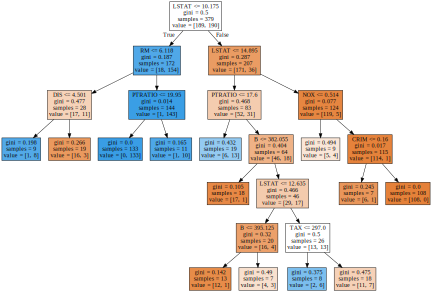

In [57]:
tree = DecisionTreeClassifier(random_state=0, min_samples_leaf = 7, min_samples_split=20, max_depth=9)
visualization(tree, True)

# Exercise 2: Regression with random forest

For this exercise we will use the nycflights dataset ("flights.csv").

So far, we have only considered how to use decision trees and random forests for classification. However, both algorithms can also be used for regression tasks, as we will see in the exercises below.

### Preprocessing

**a)** Load the data, and consider how you want to handle missing values and categorical variables (you may choose to remove some features entirely). Carefully consider which variables are categorical. Normalize all relevant variables.


In [24]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn # for visualizations

from sklearn.model_selection import train_test_split
#Cross-Validation & GridSearch
from sklearn.model_selection import cross_val_score, GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
import pydotplus



from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 



In [25]:
data = pd.read_csv("flights.csv")
# We pick a treshold of missing values. In this particular case we decide that should a value have more thatn 25% missing values, it will be dropped.
data.isna().mean()>=0.25
#We make the conclusion that none of the columns are above that threshold 
data

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


### Scaling?
We may also notice that there is a large difference between the range of some variables such as dep_delay and arr_time for instance. 

However, as we will be using Decision Trees and Random Forest, which do not require feature scaling to be performed as they are not sensitive to the the variance in the data, we are skipping this part.

### In order to make the process of preprocessing data smoother we create the following helper function.
How we derive the functionality of the helper function and how we argument it could be seen in the cells bellow


In [26]:
def preprocess_inputs(df):
    df=df.copy()
    #Drop unneeded columns
    df=df.drop(['Unnamed: 0','year','tailnum','flight'],axis=1)
    #Dropping missing values. This wil cleanse the data set therefore boosting our predeiction slightly compared to substituing missing values 
    #with the mean. With such a large dataset we can allow ourselves to drop these columns.
    df=df.dropna()
    return df

### To help figure out which columns would be useful or not we get a list of all unique values for the dataset
### Hence we create the following dictionary

In [27]:
{column: len(data[column].unique()) for column in data.columns}

{'Unnamed: 0': 336776,
 'year': 1,
 'month': 12,
 'day': 31,
 'dep_time': 1319,
 'dep_delay': 528,
 'arr_time': 1412,
 'arr_delay': 578,
 'carrier': 16,
 'tailnum': 4044,
 'flight': 3844,
 'origin': 3,
 'dest': 105,
 'air_time': 510,
 'distance': 214,
 'hour': 26,
 'minute': 61}

We can see that there is only one unique value for year, hence we decide to drop that column

 We copuld further see that the number of unique variables for Tail Number and Flight Number are quite high. Since we are not trying to squeeze every bit of effectivness out of our data we decide to
 drop the these two categorical values in order to improve computation time when training a model on our dataset. 

In [28]:
#We also want to deal with the missing values. First we lookup all the columns where there are missing values present. We determine that all of the columns where there are missing values are
# in fact numerical
data.isna().sum()
# Now, we could substitue the numericalcolumns with the mean values, but that would just bias our dataset. therefore,  
# since there are not that many entries that have missing values compared to the total number of entries we could drop these columns


Unnamed: 0       0
year             0
month            0
day              0
dep_time      8255
dep_delay     8255
arr_time      8713
arr_delay     9430
carrier          0
tailnum       2512
flight           0
origin           0
dest             0
air_time      9430
distance         0
hour          8255
minute        8255
dtype: int64

In [29]:
flights=preprocess_inputs(data)
flights.isna().sum()


month        0
day          0
dep_time     0
dep_delay    0
arr_time     0
arr_delay    0
carrier      0
origin       0
dest         0
air_time     0
distance     0
hour         0
minute       0
dtype: int64

**b)** In the following, we are going to determine which factors cause departure time delays, and try to predict the length of these delays. However, for several departures, a *negative* delay have been reported. How do you interpret a negative delay? Consider if you want to modify the negative delays in some way. 

We will keep the engative delays as it is a real world scenario. Planes could potentially depart sooner that expected due to faster maintence, a scenario where all passengers boarder earlier, the plave was cleaned earlier etc.

### Regression analysis: Predicting departure time delays

**c)** Extract the features and the target variable (in this case the departure time delays) from the dataframe. Split the dataset into test and train sets (technically, we ought to have done this before preprocessing. For the sake of simplicity, we do not conform to this best practice in this exercise).


In [30]:
y = flights.loc[:,'dep_delay']        #Dropping unimportant columns  #carrier  #dest  #origin                                                               
features = flights.loc[:,['air_time','arr_delay','arr_time','dep_time','distance','hour','minute','month']]
features = pd.get_dummies(features)
print(list(features.columns))
features[0:10]

['air_time', 'arr_delay', 'arr_time', 'dep_time', 'distance', 'hour', 'minute', 'month']


,air_time,arr_delay,arr_time,dep_time,distance,hour,minute,month
0,227.0,11.0,830.0,517.0,1400,5.0,17.0,1
1,227.0,20.0,850.0,533.0,1416,5.0,33.0,1
2,160.0,33.0,923.0,542.0,1089,5.0,42.0,1
3,183.0,-18.0,1004.0,544.0,1576,5.0,44.0,1
4,116.0,-25.0,812.0,554.0,762,5.0,54.0,1
5,150.0,12.0,740.0,554.0,719,5.0,54.0,1
6,158.0,19.0,913.0,555.0,1065,5.0,55.0,1
7,53.0,-14.0,709.0,557.0,229,5.0,57.0,1
8,140.0,-8.0,838.0,557.0,944,5.0,57.0,1
9,138.0,8.0,753.0,558.0,733,5.0,58.0,1


Note: The models below have been trained with a max_feautures according to after the least important feautres have been removed

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.20,random_state=42)

**d)** Train a decision tree regressor for predicting departure time delays (you might want to experiment with a few different values of the hyperparameters to avoid too much overfitting). Plot the tree, and explain how decision trees can be used for regression analyses.

I perform a cross validation in order to pick the best depth in a range

In [13]:
best_score = 0
for maximum_dept in range(10,15):
    # Set a certain number of neighbors
    dr = DecisionTreeRegressor(max_depth=maximum_dept)
    
    # Perform cross validation
    scores = cross_val_score(dr, X_train, y_train, cv=6)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_max_depth = maximum_dept

# Build a model on the combine training and valiation data
dr = DecisionTreeRegressor(max_depth=best_max_depth,random_state=0)
dr.fit(X_train, y_train)

print("Best maximum depth found: {}".format(best_max_depth))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(dr.score(X_train, y_train)))
print("Score on test set: {}".format(dr.score(X_test, y_test)))

Best maximum depth found: 14
Best average score: 0.9051598316850198
Score on training/validation set: 0.9436423601345825
Score on test set: 0.9059718175519501


In [32]:
dr = DecisionTreeRegressor(max_depth=14,random_state=0).fit(X_train, y_train)
print("Accuracy on training set: {}".format(dr.score(X_train, y_train)))
print("Accuracy on test set: {}".format(dr.score(X_test, y_test)))


Accuracy on training set: 0.9436423601345825
Accuracy on test set: 0.9059718175519501


### We visualize the decision tree

In [ ]:
plt = export_graphviz(dr, out_file=None,
                           feature_names=features.columns,
                           filled=True)

graph = graphviz.Source(plt)
graph

### The printed tree is rather big so we don't user pydotplus as it is hard to display anyway.

### How can we use Decision Trees for regresion analysis

The arguments regarding using Decision trees for regression vary. Decision trees as opposed to other algorithms require less effort on data preparation during pre-processing. They do not require normalization nor scaling of the data. Furthermore, missing values in the data are also not considerably crucial for building the decision tree. Decision three regressors are used to fit a sine curve, with additional noisy observations. That results in learning linear regression approximating to the sine curve. Although they are extremely good and easy to use, they tend to overfit quite easily. Therefore, proper alteration of hyperparameters is required so that the three does not learn fine details which would result in overfitting. Decision trees are especially useful when we have multiple predictors for they easily accommodate any additional predictors. They utilize residuals and compare them, therefore prediction accuracies improve because the least squared threshold sum is selected as the root of the three. That process is made for each predictor root.


**e)** Do a regression analysis as the one above, but using a random forest instead of a single decision tree. Use a grid-search to determine a good set of hyperparameters. When you have found the best model, score your model on the test set. Comment on the result. 

In [34]:
forest = RandomForestRegressor(n_estimators=100, max_depth=15, max_features=8, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.961
Accuracy on test set: 0.933


### We use a GridSearchCV to find a good set of parameters for the regression.
Please note that this grid search is for the model where feature importence wasn't considered. It has not been run for the new features due to the lenghtly computational time.

In [ ]:
parameter_grid = {'n_estimators':np.arange(80,100,5),'max_depth':np.arange(30,60,5),'max_features':np.arange(10,20,2), 'random_state':[0]}
forest = RandomForestRegressor()
clf = GridSearchCV(forest, parameter_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

print("Accuracy on training data = {}".format(clf.score(X_train, y_train)))
print("Accuracy on testing data = {}\n".format(clf.score(X_test, y_test)))

{'max_depth': 45, 'max_features': 18, 'n_estimators': 95, 'random_state': 0}

Accuracy on training data = 0.987409986939448

Accuracy on testing data = 0.9141701456608391

Although it gives pretty satisfying results it seems to be overfitting, therefore we narrow down the range in 10 and use step 2.

In [ ]:
parameter_grid = {'n_estimators':np.arange(90,100,2),'max_depth':np.arange(40,50,2),'max_features':np.arange(16,20,1), 'random_state':[0]}
forest = RandomForestRegressor()
clf = GridSearchCV(forest, parameter_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

print("Accuracy on training data = {}".format(clf.score(X_train, y_train)))
print("Accuracy on testing data = {}\n".format(clf.score(X_test, y_test)))

{'max_depth': 46, 'max_features': 19, 'n_estimators': 98, 'random_state': 0}

Accuracy on training data = 0.9882790081603173

Accuracy on testing data = 0.9177442659385555

Ones again the model is slightly overfitting but this is due to the tree nature for every tree sligthly overfits. These parameters however ensure that the amount of overfitting is kept to a minimum. Ideally, we could do one more iteration where we would use steps=1, which should in theory gives us the best possible output. However due to time computation reasons, we ommit from that in this case and go with the slightly worse set of hyperparemetrs.

At this point I realized that the trees that are made are way to deep. Thefore I've lowered the depth which slightly decreased the performance but now the model is way more generalized.  An additional GridSearch could be performed at this stage to find the best depth for a lower range. But this step is ommitted in the analysis due to the computation time. -->

In [22]:
forest = RandomForestRegressor(n_estimators=95, max_depth=15, max_features=8, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.961
Accuracy on test set: 0.933


**f)** Plot the feature importances determined by the tree. Which feature is the most important? Do you have any idea as to why? Remove any features which cannot be used to predict departure time delays in any meaningful way, and redo the analysis. Comment on your results.

### Feature Importance 


In [25]:
rnd_rgs = RandomForestRegressor(n_estimators=95, max_depth=15, max_features=15, random_state=0)
rnd_rgs.fit(X_train, y_train)
for name, importance in zip(features.columns, rnd_rgs.feature_importances_):
    print(name, "=", importance)

air_time = 0.016133037251429987
arr_delay = 0.6767935481302272
arr_time = 0.07824328031681504
dep_time = 0.0687514968946877
distance = 0.012453400498367212
hour = 0.06300342236342317
minute = 0.012835747390632663
month = 0.010478005081173754
dest_ABQ = 5.47425556747041e-05
dest_ACK = 4.021238526914331e-06
dest_ALB = 3.589711892550696e-05
dest_ANC = 5.684908916683516e-07
dest_ATL = 0.000903351341187005
dest_AUS = 0.00018485362125269378
dest_AVL = 1.711937970690911e-05
dest_BDL = 6.55749428386143e-05
dest_BGR = 8.554535023401724e-05
dest_BHM = 4.426468394563234e-05
dest_BNA = 0.0005200270127827749
dest_BOS = 0.00040772584861804135
dest_BQN = 0.0005844436989070189
dest_BTV = 0.0002508293112497133
dest_BUF = 0.00024397694934273916
dest_BUR = 0.00011218483867504733
dest_BWI = 0.00027153452233738627
dest_BZN = 2.576212043585119e-06
dest_CAE = 2.8543566119618958e-05
dest_CAK = 0.00019141521318327925
dest_CHO = 1.5021304961705281e-05
dest_CHS = 0.0001454790878565886
dest_CLE = 0.00034820369891

Plot feautre importance

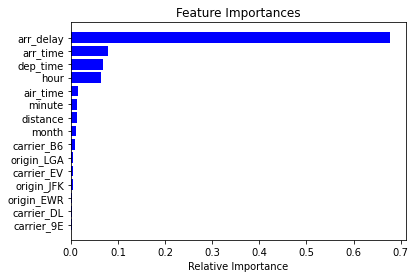

In [36]:
featuresN = features.columns

importances = rnd_rgs.feature_importances_
indices = np.argsort(importances)
num_features = 15
plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [featuresN[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

### Why are thee features deamed important?
The most important feature is to predict departure delay is clearly arr_delay. This is so since the arrival time of a plane is highly dependant on the departime time. As sooner or later the plane leaves the smaller or greater the arrival delay is. Furthermore, air time is also highly relevant for it accounts for the fact whether the plane did account for the late departure by increasing the speed therefore decreasing air_time. Arrival time is also highly relevant for it is the product of air time and a departure time.

### Removing unimportant or least important features

Removing the least important features made a small difference. A small drop in performence was registered in the DecisionTree whereas the RandomForest wasn't affected as much. The RandomForest shouldn't have been much affected due to the fact that each individual tree is trained on a random subset of the features and when trees are combined, there is little correlation between them, reducing the risk of over-fitting and building dependencies between trees. 

In the scenario of the RandomForest acually imporving, that would've suggested that we've allowed overfitting either by, small number of random trees, or very deep trees for example. Therefore removing features would have allowed for the model to be more generalised. However by utilizing gridSearch several times by changing the range and reducing the steps taken, optimal hyperparemeters were chosesn.

### Regression analysis: Predicting arrival time delays

In the last part of the exercise, we are going to try to predict arrival time delays as a function of departure time delays - it might be of interest to know how large a delay one should expect after the plane has departed from the airport. 

**g)** Train a decision tree or random forest regressor and an OLS to the dataset, and see how well arrival time delay. can be predicted based on departure time delay. 


Training a Decision tree

In [48]:
flightsArrivals=preprocess_inputs(data)

In [49]:
y = flightsArrivals.loc[:,'arr_delay']
featuresArrivals = flightsArrivals.loc[:,['dep_delay']]
featuresArrivals = pd.get_dummies(featuresArrivals)
print(list(featuresArrivals.columns))
featuresArrivals[0:10]


['dep_delay']


,dep_delay
0,2.0
1,4.0
2,2.0
3,-1.0
4,-6.0
5,-4.0
6,-5.0
7,-3.0
8,-3.0
9,-2.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(featuresArrivals,y,test_size=0.2,random_state=42)

In [40]:
best_score = 0
for maximum_dept in range(13,16):
    # Set a certain number of neighbors
    dr = DecisionTreeRegressor(max_depth=maximum_dept)
    
    # Perform cross validation
    scores = cross_val_score(dr, X_train, y_train, cv=6)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_max_depth = maximum_dept

# Build a model on the combine training and valiation data
dr = DecisionTreeRegressor(max_depth=best_max_depth,random_state=0)
dr.fit(X_train, y_train)

print("Best maximum depth found: {}".format(best_max_depth))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(dr.score(X_train, y_train)))
print("Score on test set: {}".format(dr.score(X_test, y_test)))

Best maximum depth found: 13
Best average score: 0.8372217116919582
Score on training/validation set: 0.8384428691903589
Score on test set: 0.8338748528351316


In [41]:
dr = DecisionTreeRegressor(max_depth=13,random_state=0)
dr.fit(X_train, y_train)
print("Accuracy on training set: {}".format(dr.score(X_train, y_train)))
print("Accuracy on test set: {}".format(dr.score(X_test, y_test)))

Accuracy on training set: 0.8384428691903589
Accuracy on test set: 0.8338748528351316


Training an OLS

In [42]:
ODS = LinearRegression()
ODS.fit(X_train, y_train)

LinearRegression()

In [43]:
print("R^2 on train data is {} and on test data is {}".format(ODS.score(X_train, y_train), 
                                                              ODS.score(X_test,y_test)))

R^2 on train data is 0.8375539313864797 and on test data is 0.8340600011929235


**h)** Plot the arrival time delays as a function of the departure time delay, and show the predictions from each of the two regressors.

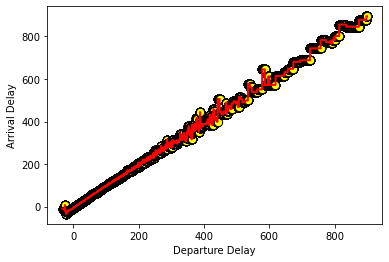

In [51]:


x_test_arr=np.arange(min(pd.DataFrame.min(X_test)),max(pd.DataFrame.max(X_test)),0.01)[:, np.newaxis]


y_predict=dr.predict(x_test_arr)

plt.figure()
plt.scatter(x_test_arr, y_predict,s=70, edgecolor="black", c="yellow")
plt.plot(x_test_arr,y_predict, color="red",linewidth=2)
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.show()

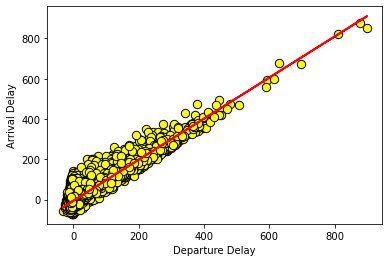

In [52]:
y_predict=ODS.predict(X_test)
plt.scatter(X_test, y_test,s=70, edgecolor="black", c="yellow")
plt.plot(X_test,y_predict, color="red",linewidth=2)
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.show()

Decision trees take the input space and partition it into subsections which each corresponds to a singuar output value. Therefore a decision tree used for regression would have a hard time trying to model a continuoes function. I nconclusion, decisions trees cannot extrapplate beyond the training data. However looking at the previous model we can conclude that OLS would be suitable for predicting larger values for delays than the ones in the training set. We could extrapolate the plot by adding some new entries to the data that are larger than the maximum value.

**i)** Based on the results obtained above, make a plot that extrapolates a little bit in order to predict delays slightly larger than the largest delay found in the dataset. Which model do you think gives the most trustworthy extrapolation? 

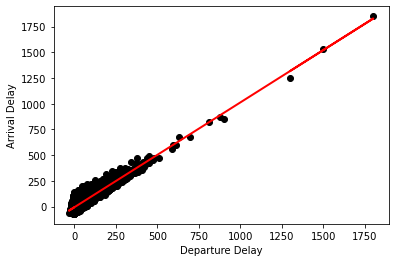

In [53]:
newX=[{'dep_delay':1800},{'dep_delay':1500},{'dep_delay':1300}]
X_test=X_test.append(newX,ignore_index=True)
newY=[1850,1530,1250]
newY=pd.Series(newY)
y_test=y_test.append(newY,ignore_index=True)
y_predict=ODS.predict(X_test)
plt.scatter(X_test, y_test,color="black")
plt.plot(X_test,y_predict, color="red",linewidth=2)
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.show()


# Exercise 3: SVM

In this exercise we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0-9 at a resolution of 28x28 pixels. In the cell below, the dataset is loaded and split into 60000 traning and 10000 testing images, and reshaped into the appropriate shape for an SVM classifier.

In [36]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from time import time

(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()
x_train_full = x_train_full.reshape(-1,28*28)
x_test_full = x_test_full.reshape(-1,28*28)

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

In [37]:
# digit0=3
# digit1=7
# x_bin_train=x_train[np.logical_or(y_train==digit0,y_train==digit1)]
# y_bin_train=y_train[np.logical_or(y_train==digit0,y_train==digit1)]

# x_bin_test=x_test[np.logical_or(y_test==digit0,y_test==digit1)]
# y_bin_test=y_test[np.logical_or(y_test==digit0,y_test==digit1)]

# print("The first training datapoint now is: \n")
# plt.imshow(x_bin_train[0].reshape(28,28),cmap=plt.cm.gray_r)
# plt.show()
# print(y_bin_train[0])

### Training an SVM model

**a)** Learn different SVM models by varying e.g. the kernel functions and/or the C- and gamma-parameters. For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).

In [38]:
# construct a parameter grid
# to make learning and experimenting easier, I cut the lenght of the datasets
x_train = x_train_full[:3000];
y_train = y_train_full[:3000];
x_test = x_test_full[:200]
y_test = y_test_full[:200]

# function to find the best parameters in a range
def best_params():
    model = SVC()
    pgrid = {'C': 10 ** (np.linspace(-3, 3, 7)), 'gamma': ('scale', 'auto'), 'kernel': ('rbf', 'poly')}
    clf = GridSearchCV(model, pgrid)
    clf.fit(x_train, y_train)
    print('best params: ' + str(clf.best_params_))

# function to find the fit time of certain params
def fit_time(C, gamma, kernel, x, y):
    model = SVC(C=C, gamma=gamma, kernel=kernel)
    start = time()
    model.fit(x, y)
    end = time()
    print('C={}gamma={}kernel={}{}ms'.format(str(C).ljust(8, ' '), gamma.ljust(7, ' '), kernel.ljust(6), round((end - start) * 1000)))
    
fit_time(.0001, 'scale', 'rbf', x_train, y_train)
fit_time(.0001, 'auto', 'rbf', x_train, y_train)
fit_time(.0001, 'scale', 'poly', x_train, y_train)
fit_time(.0001, 'auto', 'poly', x_train, y_train)

fit_time(1, 'scale', 'rbf', x_train, y_train)
fit_time(1, 'auto', 'rbf', x_train, y_train)
fit_time(1, 'scale', 'poly', x_train, y_train)
fit_time(1, 'auto', 'poly', x_train, y_train)

fit_time(10, 'scale', 'rbf', x_train, y_train)
fit_time(10, 'auto', 'rbf', x_train, y_train)
fit_time(10, 'scale', 'poly', x_train, y_train)
fit_time(10, 'auto', 'poly', x_train, y_train)

fit_time(1000, 'scale', 'rbf', x_train, y_train)
fit_time(1000, 'auto', 'rbf', x_train, y_train)
fit_time(1000, 'scale', 'poly', x_train, y_train)
fit_time(1000, 'auto', 'poly', x_train, y_train)
best_params()

C=0.0001  gamma=scale  kernel=rbf   5724ms
C=0.0001  gamma=auto   kernel=rbf   6231ms
C=0.0001  gamma=scale  kernel=poly  5370ms
C=0.0001  gamma=auto   kernel=poly  1206ms
C=1       gamma=scale  kernel=rbf   1594ms
C=1       gamma=auto   kernel=rbf   6562ms
C=1       gamma=scale  kernel=poly  1389ms
C=1       gamma=auto   kernel=poly  1097ms
C=10      gamma=scale  kernel=rbf   1372ms
C=10      gamma=auto   kernel=rbf   6306ms
C=10      gamma=scale  kernel=poly  1169ms
C=10      gamma=auto   kernel=poly  1152ms
C=1000    gamma=scale  kernel=rbf   1590ms
C=1000    gamma=auto   kernel=rbf   6711ms
C=1000    gamma=scale  kernel=poly  1334ms
C=1000    gamma=auto   kernel=poly  1243ms
best params: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


**b)** Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? (Hint: you can e.g. use the numpy where() function to extract the indices of the test cases that were misclassified: misclass = np.where(test != predictions) )

In [6]:
def show(index, data):
    plt.imshow(data[index].reshape(28,28),cmap=plt.cm.gray_r)
    plt.show()

accuracy: 97.8%
mismatches: 11


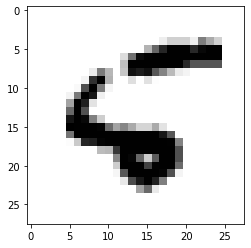

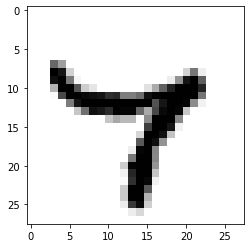

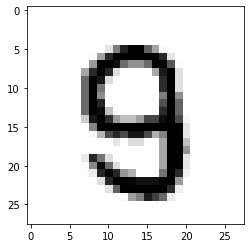

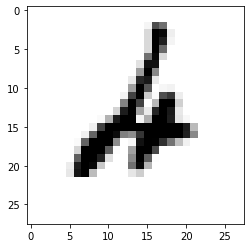

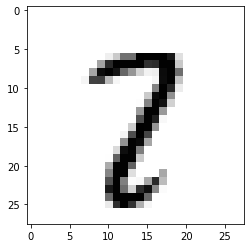

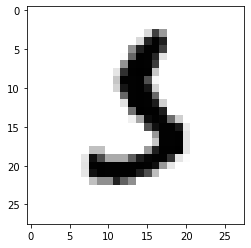

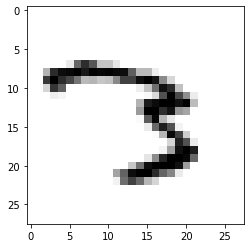

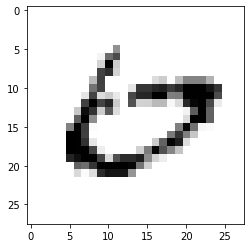

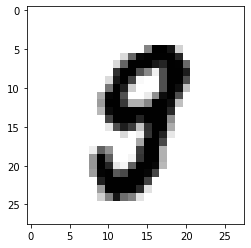

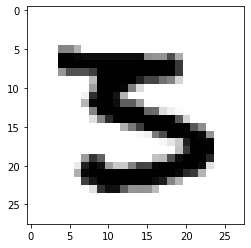

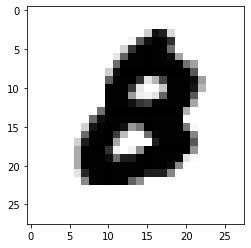

In [13]:
model = SVC(C=10, gamma='scale', kernel='rbf')
x_train = x_train_full[:40000]
y_train = y_train_full[:40000]
x_test = x_test_full[:500]
y_test = y_test_full[:500]
model.fit(x_train, y_train)
misclass = np.where(model.predict(x_test) != y_test)[0]
print('accuracy: ' + str(round(model.score(x_test, y_test) * 10000) / 100) + '%')
print('mismatches: ' + str(len(misclass)))
for i in misclass:
    show(i, x_test)

Some of the misclassified cases are indeed hard to recognize (or even impossible) for the human reader. However, many of the digits are indeed recognizable. As we increase the training set, the accuracy does increase, but with a big tradeoff for training time. In above case it went from 96% to 97.8% accuracy by going from 2000 datapoints to 40000, thus 20-folding the training time (which became a few minutes).

**c)** How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5').

In [28]:
# We are just going to use the hyperparams that we found the most accurate:
# C=10 gamma='scale' kernel='rbf'

def test(digit_a, digit_b):
    model = SVC(C=10, gamma='scale', kernel='rbf')
    x_train = x_train_full[np.logical_or(y_train_full==digit_a, y_train_full==digit_b)]
    y_train = y_train_full[np.logical_or(y_train_full==digit_a, y_train_full==digit_b)]
    x_test = x_test_full[np.logical_or(y_test_full==digit_a, y_test_full==digit_b)]
    y_test = y_test_full[np.logical_or(y_test_full==digit_a, y_test_full==digit_b)]
    
    start = time()
    model.fit(x_train, y_train)
    end = time()
    
    print('Fit time for digits {} and {}: {}ms'.format(digit_a, digit_b, round((end - start) * 1000)))
    print('Accuracy for digits {} and {}: {}%'.format(digit_a, digit_b, round(model.score(x_test, y_test) * 10000) / 100))
    
test(0, 1)
test(4, 5)
test(0, 8)
test(6, 8)

Fit time for digits 0 and 1: 1067ms
Accuracy for digits 0 and 1: 99.95%
Fit time for digits 4 and 5: 2786ms
Accuracy for digits 4 and 5: 99.95%
Fit time for digits 0 and 8: 2603ms
Accuracy for digits 0 and 8: 99.49%
Fit time for digits 6 and 8: 2916ms
Accuracy for digits 6 and 8: 99.74%


From above results we can see that training time increases as the distinguishment becomes harder.

For easy such as 0 and 1 it is 1 second, while for harder ones it's 2.5 - 3 seconds, but it stays in the same order of magnitude (i.e. 1-10 seconds).

Accuracy seems to be rather constant. We can see 3rd digit differences (0.9995 vs 0.9974), but those could also mean inconsistencies in the datapoints or randomness.

**d)** Explain how a binary classifier, such as an SVM, can be applied to a multiclass classification problem, such as recognizing all 10 digits in the MNIST dataset (no coding required in this exercise!).

### Answer

There are 2 main solutions to using SVM's as multiclass classifiers. Both solutions include appending multiple binary classifiers together to get a final result.

#### 1 One-to-one

In the one-to-one scenario, a we use a SVM for each pair of classes, i.e. if we have A, B and C, then we will have an A-B classifier that disregards all C data points, one for A-C disregarding all B's and a B-C disregarding all A's. Multiple of these checks can produce a multiclass classification.

#### 2 One-to-rest

In one-to-rest classification, there is a classifier for each class and the rest of the datapoints, i.e. a classifier for A-(BC), a classifier for B-(AC) and a classifier for C-(AB). Similarly to the one-to-one solution, multiple runs of classification can product a multiclass categorization.

**e)** Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using sklearn.metrics.confusion_matrix you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [31]:
# From previous examples I already experimented with different configs.
# The best approach according to grid search appears to be C=10 kernel=rbf gamma='scale'
# To achieve a less than one minute training time, we should keep our training data under 20,000
x_train = x_train_full[:10000]
y_train = y_train_full[:10000]
x_test = x_test_full[:2000]
y_test = y_test_full[:2000]
model = SVC(C=10, kernel='rbf', gamma='scale')
start = time()
model.fit(x_train, y_train)
end = time()

print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Fit time: {}s'.format(round((end - start) * 100) / 100))

# This achieves a relatively high score (~95%) while keeping training time low.
# If we needed higher accuracy, more data should be input (up to 100 000 or more)
# We will still have errors, as some of the digits are not recognizable even for a human.

Accuracy: 0.9555
Fit time: 10.74s


### Cheating

We next investigate the capability of the different learning approaches to find a good model, knowing that a very accurate model exists. For this, we add a 'cheat column' to our data: we add an additional column to the data matrix that simply contains a 0/1 encoding of the actual class label: 

The SVM-model is, in principle, able to construct a 100% accurate classifier for this data: we only have to 'learn' that only the last column in the data matters. 

**f)** Describe, briefly, how the coefficients and weights of an SVM model would have to be set, so that the resulting model is 100% accurate on this cheating data. This part of the exercise does not involve any code. Just give your answer in a short text.

**Answer**

Since Scaling matters when working with SVM's, the cheating column(s) should have large weights compared to non-cheating columns, therefore increasing their significance. For example, having 0..1 range on the pixels, just as now, and multiplying the cheating column's digit value with 100.

**g)** Investigate how the accuracy of different SVM classifiers improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why?

In [95]:
def test(C, gamma, kernel, x, y, x_t, y_t):
    model = SVC(C=C, gamma=gamma, kernel=kernel)
    model.fit(x, y)
    print('Accuracy for C={} gamma={} kernel={}: {}'
          .format(C, gamma, kernel, model.score(x_t, y_t)))
    
# I rewired the example initially above to have full classification, not only binary
#adding cheating information to the training data:
cheatcol_train=np.array(y_train_full) #making a copy of the original target array
cheatcol_train=cheatcol_train.reshape(-1,1) #getting the dimensions right for the following .hstack operation to work ... 

#adding cheating information to the testing data:
cheatcol_test=np.array(y_test_full) #making a copy of the original target array
cheatcol_test=cheatcol_test.reshape(-1,1) #getting the dimensions right for the following .hstack operation to work ... 
    
train_size = 5000
test_size = 1000

x_train = np.hstack((x_train_full[:train_size], cheatcol_train[:train_size]))
y_train = y_train_full[:train_size]
x_test = np.hstack((x_test_full[:test_size], cheatcol_test[:test_size]))
y_test = y_test_full[:test_size]

test(10, 'scale', 'rbf', x_train, y_train, x_test, y_test)
test(10, 'scale', 'poly', x_train, y_train, x_test, y_test)
test(.1, 'scale', 'rbf', x_train, y_train, x_test, y_test)

# now let's do the same, but with 1000-fold scale for the cheat column
x_train = np.hstack((x_train_full[:train_size], cheatcol_train[:train_size].astype(int) * 1000))
y_train = y_train_full[:train_size]
x_test = np.hstack((x_test_full[:test_size], cheatcol_test[:test_size].astype(int) * 1000))
y_test = y_test_full[:test_size]

test(10, 'scale', 'rbf', x_train, y_train, x_test, y_test)
test(10, 'scale', 'poly', x_train, y_train, x_test, y_test)
test(.1, 'scale', 'rbf', x_train, y_train, x_test, y_test)

Accuracy for C=10 gamma=scale kernel=rbf: 0.945
Accuracy for C=10 gamma=scale kernel=poly: 0.926
Accuracy for C=0.1 gamma=scale kernel=rbf: 0.89
Accuracy for C=10 gamma=scale kernel=rbf: 1.0
Accuracy for C=10 gamma=scale kernel=poly: 0.994
Accuracy for C=0.1 gamma=scale kernel=rbf: 1.0


As we can see, the 1000 fold scale achieved a 100% accuracy in 2 cases and 99.4% in the 3rd case, which is still a significant increase. We could scale our weights even more up (let's say 10000), until we achieve 100% accuracy.

Furthermore it also looks as if rbf was more susceptible to scaling than poly.

# Exercise 4: Data exploration and logistic regression

In this exercise, you are going to investigate student dropout based on the dataset "churn.cvs". This is a real dataset, and there is no single "correct" way to use it (however, there are several wrong ones!). Your exercise is to explore one or more possible use cases, and document the one(s) you find the most fruitful/interesting.  Your work should probably include the steps below:

- An investigation of the data, using e.g. FACETs, Pandas, and/or whatever other tools you prefer. Can you find any interesting correlations? Are there problematic features or rows in the dataset?
- Handle missing data and possible outliers (in each case, consider what you want to do: Remove row? Remove column? Insert custom value?).
- Normalize/bin/create dummy variables where relevant. 
- Determine what you would like to predict, i.e. choose your target variable. Try formulating a specific usecase for your experiment (e.g. "Given a students perfomance in high school and first semester, what is the probability that he/she churns in the 2. semester?")
- Train a logistic regression and at least one other algorithm on the data. Use either manual tuning or cross validation to find a good set of hyperparameters for each model. Do you see any specific advantages in using a logistic regression in this case?
- What features seem to be important for predicting whether a student is likely to drop out?

Warning: Make sure you carefully consider what information is available at the time where a prediction is to be made - for example, it doesn't make any sense to try to predict if a student churns in semester 1, if you include a feature which tells that this student churned in semester 2!  So depending on your specific use case, you should probably remove some columns and/or rows before you train your model.

##### We will predict if a student will drop out (churned_all), based on their admission data (all columns, excluding the first semester fields), so that a university could use a student's data prior to admission to estimate whether that student is likely to drop out or not

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

We want to clean all the data at first and drop the unnecessary columns.

In [59]:
data = pd.read_csv("churn.csv")
print(data.columns)

Index(['Nationality', 'Age_at_studystart', 'Study_programme',
       'Study_programme_code', 'Studystart_date', 'Studystart_month',
       'Studystart_year', 'Studyend_month', 'Studyend_year',
       'University_institute', 'Status', 'Exam_year',
       'Exam_grade_point_average', 'Grading_scale', 'Exam_type',
       'Priority_number', 'Quote', 'Passed_ects_SEM1',
       'Grade_point_average_SEM1', 'SU_clips_used', 'Years_since_exam',
       'CHURNED_ALL', 'CHURNED_IN_SEM1', 'CHURNED_IN_SEM2',
       'CHURNED_AFTER_SEM1', 'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'],
      dtype='object')


The columns that are irrelevant and can be dropped right away are: Studyend_month, Studyend_year, Status, Passed_ects_SEM1, Grade_point_average_SEM1, SU_clips_used.
We also have columns that are irrelevant, but need are needed for data preparation: 'CHURNED_IN_SEM1', 'CHURNED_IN_SEM2', 'CHURNED_AFTER_SEM1', 'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'

In [60]:
data=data.drop(columns=['Studyend_month', 'Studyend_year', 'Status', 'Passed_ects_SEM1', 'Grade_point_average_SEM1', 'SU_clips_used'])
print(data.columns)

Index(['Nationality', 'Age_at_studystart', 'Study_programme',
       'Study_programme_code', 'Studystart_date', 'Studystart_month',
       'Studystart_year', 'University_institute', 'Exam_year',
       'Exam_grade_point_average', 'Grading_scale', 'Exam_type',
       'Priority_number', 'Quote', 'Years_since_exam', 'CHURNED_ALL',
       'CHURNED_IN_SEM1', 'CHURNED_IN_SEM2', 'CHURNED_AFTER_SEM1',
       'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'],
      dtype='object')


Handling missing data first;
Checking that these columns don't have missing values

In [61]:
print(data['Nationality'].isnull().values.any())
print(data['Study_programme'].isnull().values.any())
print(data['Studystart_date'].isnull().values.any())
print(data['Studystart_month'].isnull().values.any())
print(data['Studystart_year'].isnull().values.any())
print(data['Exam_year'].isnull().values.any())
print(data['Exam_grade_point_average'].isnull().values.any())
print(data['Years_since_exam'].isnull().values.any())
print(data['CHURNED_ALL'].isnull().values.any())
print(data['CHURNED_IN_SEM1'].isnull().values.any())
print(data['CHURNED_IN_SEM2'].isnull().values.any())
print(data['CHURNED_AFTER_SEM1'].isnull().values.any())
print(data['CHURNED_AFTER_SEM2'].isnull().values.any())
print(data['CHURNED_SEM2THROUGHSEM3'].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [62]:
print("Number of null values in Quote: ", data['Quote'].isnull().sum())
print("Number of null values in Grading_scale: ", data['Grading_scale'].isnull().sum())
print("Number of null values in Exam_type: ", data['Exam_type'].isnull().sum())
print("Number of null values in Priority_number: ", data['Priority_number'].isnull().sum())

Number of null values in Quote:  86
Number of null values in Grading_scale:  58
Number of null values in Exam_type:  68
Number of null values in Priority_number:  1


For the missing priority number, we'll just insert the mode value of the column

In [63]:
data['Priority_number'].fillna(data['Priority_number'].mode().iat[0])

0        1.0
1        1.0
2       21.0
3        6.0
4        1.0
        ... 
1995     1.0
1996     1.0
1997     1.0
1998     1.0
1999     1.0
Name: Priority_number, Length: 2000, dtype: float64

Quote, Grading_scale and Exam_type are important features, and we don't want to badly assume their values and build a bad model, so we want to drop the entries that have null values in these columns.

Since there is only one student without a known age in the dataset, we can either just drop that entry or we could add a dummy value, like the mean, or mode of the Age_at_studystart column

In [64]:
print("Number of null values in Age_at_studystart: ", data['Age_at_studystart'].isnull().sum())
data['Age_at_studystart'] = data['Age_at_studystart'].fillna(data['Age_at_studystart'].mode()[0])
print("Number of null values in Age_at_studystart: ", data['Age_at_studystart'].isnull().sum())

Number of null values in Age_at_studystart:  1
Number of null values in Age_at_studystart:  0


University_institute has one missing value, so we will just drop the entry later.

In [65]:
print("Number of null values in University_institute: ", data['University_institute'].isnull().sum())

Number of null values in University_institute:  1


At this point, all of the columns with null values that we wanted to handle were handled, so we can drop the entries with null values in the other columns.

In [66]:
data=data.dropna()
print(data.shape)
data

(1795, 21)


,Nationality,Age_at_studystart,Study_programme,Study_programme_code,Studystart_date,Studystart_month,Studystart_year,University_institute,Exam_year,Exam_grade_point_average,...,Exam_type,Priority_number,Quote,Years_since_exam,CHURNED_ALL,CHURNED_IN_SEM1,CHURNED_IN_SEM2,CHURNED_AFTER_SEM1,CHURNED_AFTER_SEM2,CHURNED_SEM2THROUGHSEM3
0,Danmark,20.7,litteraturvidenskab,HFMA00001T,9/1/2013,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,8.0,...,Studentereksamen (2008 og senere),1.0,2.0,1,1,1,0,0,0,0
1,Danmark,22.4,dansk,HRVA00001T,9/1/2013,9,2013,Institut for Kunst og Kulturvidenskab,2015,4.9,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0
2,Danmark,20.9,informationsvidenskab og kulturformidling,HTEA00001T,9/1/2014,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,4.8,...,Studentereksamen,21.0,1.0,1,0,1,0,0,0,0
3,Danmark,21.3,paedagogik,HTEA00001T,9/1/2016,9,2013,Institut for Engelsk. Germansk og Romansk,2012,4.1,...,Studentereksamen (2008 og senere),6.0,1.0,23,0,1,0,0,0,0
4,Sverige,19.9,audiologopaedi,HKMA00001T,9/1/2014,9,2013,Institut for Medier. Erkendelse og Formidling,2012,8.5,...,Studentereksamen (2008 og senere),1.0,1.0,3,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Danmark,24.2,informationsvidenskab og kulturformidling,HFRA00001T,9/1/2015,9,2016,Institut for Tvaerkulturelle og regionale studier,2014,11.3,...,Studentereksamen (2008 og senere),1.0,1.0,0,0,0,0,0,0,0
1996,Danmark,61.6,koreastudier,HDAA00001T,9/1/2016,9,2016,Institut for Kunst og Kulturvidenskab,2014,0.0,...,Studentereksamen,1.0,1.0,-1,0,1,0,0,0,0
1997,Danmark,23.3,kinastudier,HENA00001T,9/1/2016,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2008,2.7,...,Studentereksamen (2008 og senere),1.0,1.0,0,1,0,0,0,0,0
1998,Danmark,22.1,dansk,HHIA00001T,9/1/2014,9,2016,Institut for Engelsk. Germansk og Romansk,2012,6.8,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0


We need to make sure that CHURNED_ALL column is filled with 1 only if one of the other CHURNED_* fields are filled with one. If the others are all 0, and CHURNED_ALL is 1, then we drop the entry. If CHURNED_ALL is 0, but any of the others are true, we drop it as well.

In [67]:
data = data.reset_index(drop=True)
for i in range(len(data.index)):
    if (data.at[i,'CHURNED_IN_SEM1'] == 1 or data.at[i,'CHURNED_IN_SEM2'] == 1 or data.at[i,'CHURNED_AFTER_SEM1'] == 1 or data.at[i,'CHURNED_AFTER_SEM2'] == 1 or data.at[i,'CHURNED_SEM2THROUGHSEM3'] == 1) and data.at[i,'CHURNED_ALL'] == 0:
        data.drop(i)
    if (data.at[i,'CHURNED_IN_SEM1'] == 0 and data.at[i,'CHURNED_IN_SEM2'] == 0 and data.at[i,'CHURNED_AFTER_SEM1'] == 0 and data.at[i,'CHURNED_AFTER_SEM2'] == 0 and data.at[i,'CHURNED_SEM2THROUGHSEM3'] == 0) and data.at[i,'CHURNED_ALL'] == 1:
               data.drop(i)
data = data.reset_index(drop=True)
data

,Nationality,Age_at_studystart,Study_programme,Study_programme_code,Studystart_date,Studystart_month,Studystart_year,University_institute,Exam_year,Exam_grade_point_average,...,Exam_type,Priority_number,Quote,Years_since_exam,CHURNED_ALL,CHURNED_IN_SEM1,CHURNED_IN_SEM2,CHURNED_AFTER_SEM1,CHURNED_AFTER_SEM2,CHURNED_SEM2THROUGHSEM3
0,Danmark,20.7,litteraturvidenskab,HFMA00001T,9/1/2013,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,8.0,...,Studentereksamen (2008 og senere),1.0,2.0,1,1,1,0,0,0,0
1,Danmark,22.4,dansk,HRVA00001T,9/1/2013,9,2013,Institut for Kunst og Kulturvidenskab,2015,4.9,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0
2,Danmark,20.9,informationsvidenskab og kulturformidling,HTEA00001T,9/1/2014,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,4.8,...,Studentereksamen,21.0,1.0,1,0,1,0,0,0,0
3,Danmark,21.3,paedagogik,HTEA00001T,9/1/2016,9,2013,Institut for Engelsk. Germansk og Romansk,2012,4.1,...,Studentereksamen (2008 og senere),6.0,1.0,23,0,1,0,0,0,0
4,Sverige,19.9,audiologopaedi,HKMA00001T,9/1/2014,9,2013,Institut for Medier. Erkendelse og Formidling,2012,8.5,...,Studentereksamen (2008 og senere),1.0,1.0,3,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Danmark,24.2,informationsvidenskab og kulturformidling,HFRA00001T,9/1/2015,9,2016,Institut for Tvaerkulturelle og regionale studier,2014,11.3,...,Studentereksamen (2008 og senere),1.0,1.0,0,0,0,0,0,0,0
1791,Danmark,61.6,koreastudier,HDAA00001T,9/1/2016,9,2016,Institut for Kunst og Kulturvidenskab,2014,0.0,...,Studentereksamen,1.0,1.0,-1,0,1,0,0,0,0
1792,Danmark,23.3,kinastudier,HENA00001T,9/1/2016,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2008,2.7,...,Studentereksamen (2008 og senere),1.0,1.0,0,1,0,0,0,0,0
1793,Danmark,22.1,dansk,HHIA00001T,9/1/2014,9,2016,Institut for Engelsk. Germansk og Romansk,2012,6.8,...,Studentereksamen (2008 og senere),1.0,1.0,1,0,0,0,0,0,0


The Quote column is supposed to only have 1 or 2.

In [68]:
data['Quote'].unique()

array([2., 1.])

The Studystart_month columns should only have values from 1 to 12. And Studystart_year and Exam_year should have years within the past few decades, at most.

In [69]:
data['Studystart_month'].unique()

array([9, 2], dtype=int64)

In [70]:
data['Studystart_year'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

In [71]:
data['Exam_year'].unique()

array([2013, 2015, 2012, 2011, 2008, 1988, 2010, 2016, 2007, 1999, 1900,
       2014, 1986, 2009, 2003, 1992, 2002, 2005, 2004, 1973, 1968, 1970,
       1965, 1994, 2000, 2001, 1997, 2006, 1964, 1987, 1989, 1979, 1969,
       1977, 1990, 1993, 1996, 1983, 1995, 1978, 1972, 1991], dtype=int64)

We handled all the inconsistencies that were relevant for our model, so we can drop the rest of the unnecessary columns:

In [72]:
data=data.drop(columns=['CHURNED_IN_SEM1', 'CHURNED_IN_SEM2', 'CHURNED_AFTER_SEM1', 'CHURNED_AFTER_SEM2', 'CHURNED_SEM2THROUGHSEM3'])
data

,Nationality,Age_at_studystart,Study_programme,Study_programme_code,Studystart_date,Studystart_month,Studystart_year,University_institute,Exam_year,Exam_grade_point_average,Grading_scale,Exam_type,Priority_number,Quote,Years_since_exam,CHURNED_ALL
0,Danmark,20.7,litteraturvidenskab,HFMA00001T,9/1/2013,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,8.0,7-trinsskala,Studentereksamen (2008 og senere),1.0,2.0,1,1
1,Danmark,22.4,dansk,HRVA00001T,9/1/2013,9,2013,Institut for Kunst og Kulturvidenskab,2015,4.9,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,1,0
2,Danmark,20.9,informationsvidenskab og kulturformidling,HTEA00001T,9/1/2014,9,2013,Saxo-Instituttet - Arkaeologi. Etnologi. Histo...,2013,4.8,7-trinsskala,Studentereksamen,21.0,1.0,1,0
3,Danmark,21.3,paedagogik,HTEA00001T,9/1/2016,9,2013,Institut for Engelsk. Germansk og Romansk,2012,4.1,7-trinsskala,Studentereksamen (2008 og senere),6.0,1.0,23,0
4,Sverige,19.9,audiologopaedi,HKMA00001T,9/1/2014,9,2013,Institut for Medier. Erkendelse og Formidling,2012,8.5,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Danmark,24.2,informationsvidenskab og kulturformidling,HFRA00001T,9/1/2015,9,2016,Institut for Tvaerkulturelle og regionale studier,2014,11.3,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,0,0
1791,Danmark,61.6,koreastudier,HDAA00001T,9/1/2016,9,2016,Institut for Kunst og Kulturvidenskab,2014,0.0,7-trinsskala,Studentereksamen,1.0,1.0,-1,0
1792,Danmark,23.3,kinastudier,HENA00001T,9/1/2016,9,2016,Institut for Nordiske Studier og Sprogvidenskab,2008,2.7,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,0,1
1793,Danmark,22.1,dansk,HHIA00001T,9/1/2014,9,2016,Institut for Engelsk. Germansk og Romansk,2012,6.8,7-trinsskala,Studentereksamen (2008 og senere),1.0,1.0,1,0


To ensure data correctness, we'll check for outliers in these columns: Age_at_studystart, Years_since_exam

<AxesSubplot:>

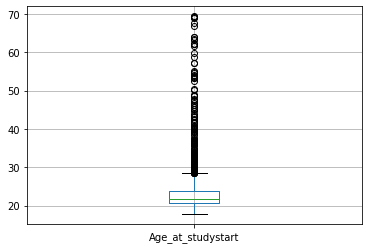

In [73]:
data.boxplot('Age_at_studystart')

Despite the Age_at_studystart having outlier values up to 70, these values are still within a the normal human's life expectancy, so we will assume the values are correct.

<AxesSubplot:>

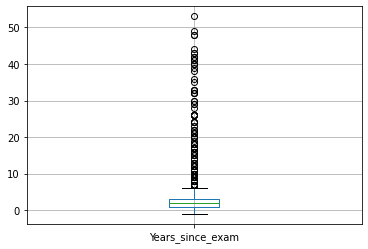

In [74]:
data.boxplot('Years_since_exam')

We can see that we have values below 0, so we would like to drop these entries

<AxesSubplot:>

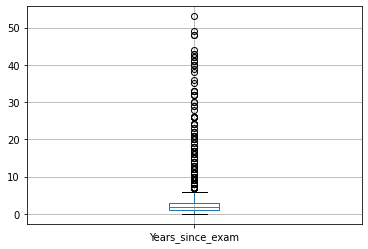

In [75]:
data.drop(data[data['Years_since_exam'] < 0].index, inplace = True)
data.boxplot('Years_since_exam')

In [76]:
data = data.reset_index(drop=True)

We want to find correlations, so we first have to get dummies (correlations won't work if you don't have integer values)

In [77]:
data = pd.get_dummies(data)
cor = data.corr()
cor

,Age_at_studystart,Studystart_month,Studystart_year,Exam_year,Exam_grade_point_average,Priority_number,Quote,Years_since_exam,CHURNED_ALL,Nationality_Afghanistan,...,Exam_type_International Baccalaureate (IB),Exam_type_Konventionsland - nord. studentereksamen,Exam_type_Saerlig tilladelse. dansk grundlag,Exam_type_Saerlig tilladelse. udenlandsk grundlag,Exam_type_Sproglig studentereksamen,Exam_type_Studentereksamen,Exam_type_Studentereksamen (2008 og senere),Exam_type_Studentereksamen fra DIAP,Exam_type_Udenlandsk/ikke aftale-land,Exam_type_Udenlandsk/konventionsland
Age_at_studystart,1.000000,-0.066523,-0.017864,0.040458,0.006149,0.041155,-0.008061,-0.014417,0.023053,0.019295,...,-0.031309,0.015417,-0.005201,-0.005757,0.002338,-0.052349,-0.003482,-0.011474,0.006910,0.053766
Studystart_month,-0.066523,1.000000,-0.062343,-0.021330,-0.006233,-0.057931,0.012557,0.025145,0.017167,0.003773,...,0.006903,0.010963,0.002177,0.003080,0.002177,-0.041018,-0.016830,0.004874,0.005771,0.006171
Studystart_year,-0.017864,-0.062343,1.000000,0.004104,0.026366,0.021502,0.001068,0.017555,-0.139212,-0.013773,...,-0.025198,0.046500,-0.007947,-0.011243,-0.007947,0.001697,-0.041405,-0.017792,-0.021064,0.007912
Exam_year,0.040458,-0.021330,0.004104,1.000000,-0.008689,0.012348,0.006009,-0.004911,-0.009081,0.012845,...,0.012663,-0.007758,0.003002,-0.003552,-0.118279,0.018883,0.006573,-0.004141,0.010878,-0.025475
Exam_grade_point_average,0.006149,-0.006233,0.026366,-0.008689,1.000000,0.005448,0.047961,0.001349,0.012259,0.009253,...,-0.005047,0.022357,0.023136,0.018153,-0.033063,0.020221,-0.031105,0.018244,-0.033725,0.015133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exam_type_Studentereksamen,-0.052349,-0.041018,0.001697,0.018883,0.020221,0.010770,-0.011862,-0.002924,-0.048583,-0.009259,...,-0.016940,-0.026902,-0.005343,-0.007558,-0.005343,1.000000,-0.339334,-0.011961,-0.014160,-0.015142
Exam_type_Studentereksamen (2008 og senere),-0.003482,-0.016830,-0.041405,0.006573,-0.031105,-0.053968,-0.000366,-0.016309,0.029475,0.027287,...,-0.116737,-0.185390,-0.036819,-0.052085,-0.036819,-0.339334,1.000000,-0.082426,-0.097584,-0.104352
Exam_type_Studentereksamen fra DIAP,-0.011474,0.004874,-0.017792,-0.004141,0.018244,0.017471,0.014167,-0.009159,0.024709,-0.002249,...,-0.004115,-0.006535,-0.001298,-0.001836,-0.001298,-0.011961,-0.082426,1.000000,-0.003440,-0.003678
Exam_type_Udenlandsk/ikke aftale-land,0.006910,0.005771,-0.021064,0.010878,-0.033725,0.012917,0.005379,0.008917,-0.030917,-0.002663,...,-0.004871,-0.007736,-0.001536,-0.002173,-0.001536,-0.014160,-0.097584,-0.003440,1.000000,-0.004355


For readability, the following for loop finds the columns that have high correlation:

In [78]:
for i in range(len(cor.columns)):
    j = i+1
    while j < len(cor.columns):
        if cor.iloc[i,j] > 0.2 and i != j:
            print(cor.columns[i], " and ", cor.columns[j], " ", cor.iloc[i,j])
        j+=1

Nationality_Belarus  and  Study_programme_italiensk   0.24891067019943175
Nationality_Den russiske foederation  and  Study_programme_code_HITA00001T   0.23453795328217272
Nationality_Island  and  Exam_type_International Baccalaureate (IB)   0.221787342169705
Nationality_Italien  and  Study_programme_polsk   0.3150345731439534
Nationality_Japan  and  Study_programme_persisk   0.2571489915685736
Nationality_Makedonien  and  Study_programme_code_HTHA00003T   0.7069017929865052
Nationality_Mexico  and  Study_programme_code_HPEA00001T   0.706901792986506
Nationality_Nederlandene  and  Study_programme_code_HIAA00001T   0.28775324909920635
Nationality_Pakistan  and  Exam_type_Almen gymnasial uddannelse   0.22237193024821925
Nationality_Rumaenien  and  Study_programme_code_HTYA00002T   0.35283530665621937
Nationality_Somalia  and  Study_programme_code_HNAA00001T   0.5770154763118409
Nationality_Ungarn  and  Study_programme_code_HRUA00001T   0.37730657090382697
Study_programme_indoeuropaeisk  a

These correlations are probably just a coincidence, since in reality these features don't have much to do with eachother

We would like to see the most important features (=those that give most variance), so we will use PCA. This is necessary, in order to decide whether we use L1 or L2 penalty for the logistic regression model.

We first need to scale the data, and then we can use PCA.

In [79]:
data = data[[c for c in data if c != 'CHURNED_ALL'] + ['CHURNED_ALL']]
data

,Age_at_studystart,Studystart_month,Studystart_year,Exam_year,Exam_grade_point_average,Priority_number,Quote,Years_since_exam,Nationality_Afghanistan,Nationality_Belarus,...,Exam_type_Konventionsland - nord. studentereksamen,Exam_type_Saerlig tilladelse. dansk grundlag,Exam_type_Saerlig tilladelse. udenlandsk grundlag,Exam_type_Sproglig studentereksamen,Exam_type_Studentereksamen,Exam_type_Studentereksamen (2008 og senere),Exam_type_Studentereksamen fra DIAP,Exam_type_Udenlandsk/ikke aftale-land,Exam_type_Udenlandsk/konventionsland,CHURNED_ALL
0,20.7,9,2013,2013,8.0,1.0,2.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,22.4,9,2013,2015,4.9,1.0,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,20.9,9,2013,2013,4.8,21.0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,21.3,9,2013,2012,4.1,6.0,1.0,23,0,0,...,0,0,0,0,0,1,0,0,0,0
4,19.9,9,2013,2012,8.5,1.0,1.0,3,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,21.5,9,2016,2000,7.5,1.0,1.0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1722,24.2,9,2016,2014,11.3,1.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1723,23.3,9,2016,2008,2.7,1.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1724,22.1,9,2016,2012,6.8,1.0,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
data_copy = data.copy()
data_copy.loc[:,'Age_at_studystart':'Exam_type_Udenlandsk/konventionsland'] = StandardScaler().fit_transform(data_copy.loc[:,'Age_at_studystart':'Exam_type_Udenlandsk/konventionsland'])
pca = PCA(n_components=None)
pca.fit(data_copy)

transformed_data = pca.transform(data_copy)

pca.explained_variance_ratio_

array([1.13003267e-02, 1.07398770e-02, 9.86813289e-03, 9.20075821e-03,
       8.80214360e-03, 8.44189316e-03, 8.31507969e-03, 8.29949145e-03,
       8.17899664e-03, 8.14583858e-03, 8.10363828e-03, 7.89353067e-03,
       7.83828370e-03, 7.78245929e-03, 7.73983158e-03, 7.65874661e-03,
       7.56831670e-03, 7.50368646e-03, 7.49014066e-03, 7.41224611e-03,
       7.31198112e-03, 7.26576526e-03, 7.22379849e-03, 7.19487838e-03,
       7.09885587e-03, 7.08758499e-03, 7.01264170e-03, 6.97789209e-03,
       6.94670146e-03, 6.87880794e-03, 6.85506443e-03, 6.82835305e-03,
       6.78937002e-03, 6.75898635e-03, 6.71283310e-03, 6.65731463e-03,
       6.64871914e-03, 6.59090798e-03, 6.53795800e-03, 6.52290946e-03,
       6.48345255e-03, 6.44266843e-03, 6.43269488e-03, 6.37713134e-03,
       6.34594108e-03, 6.30614563e-03, 6.29488772e-03, 6.25815216e-03,
       6.23406466e-03, 6.21325314e-03, 6.15439443e-03, 6.14455184e-03,
       6.12331903e-03, 6.06030487e-03, 6.03689230e-03, 6.02315064e-03,
      

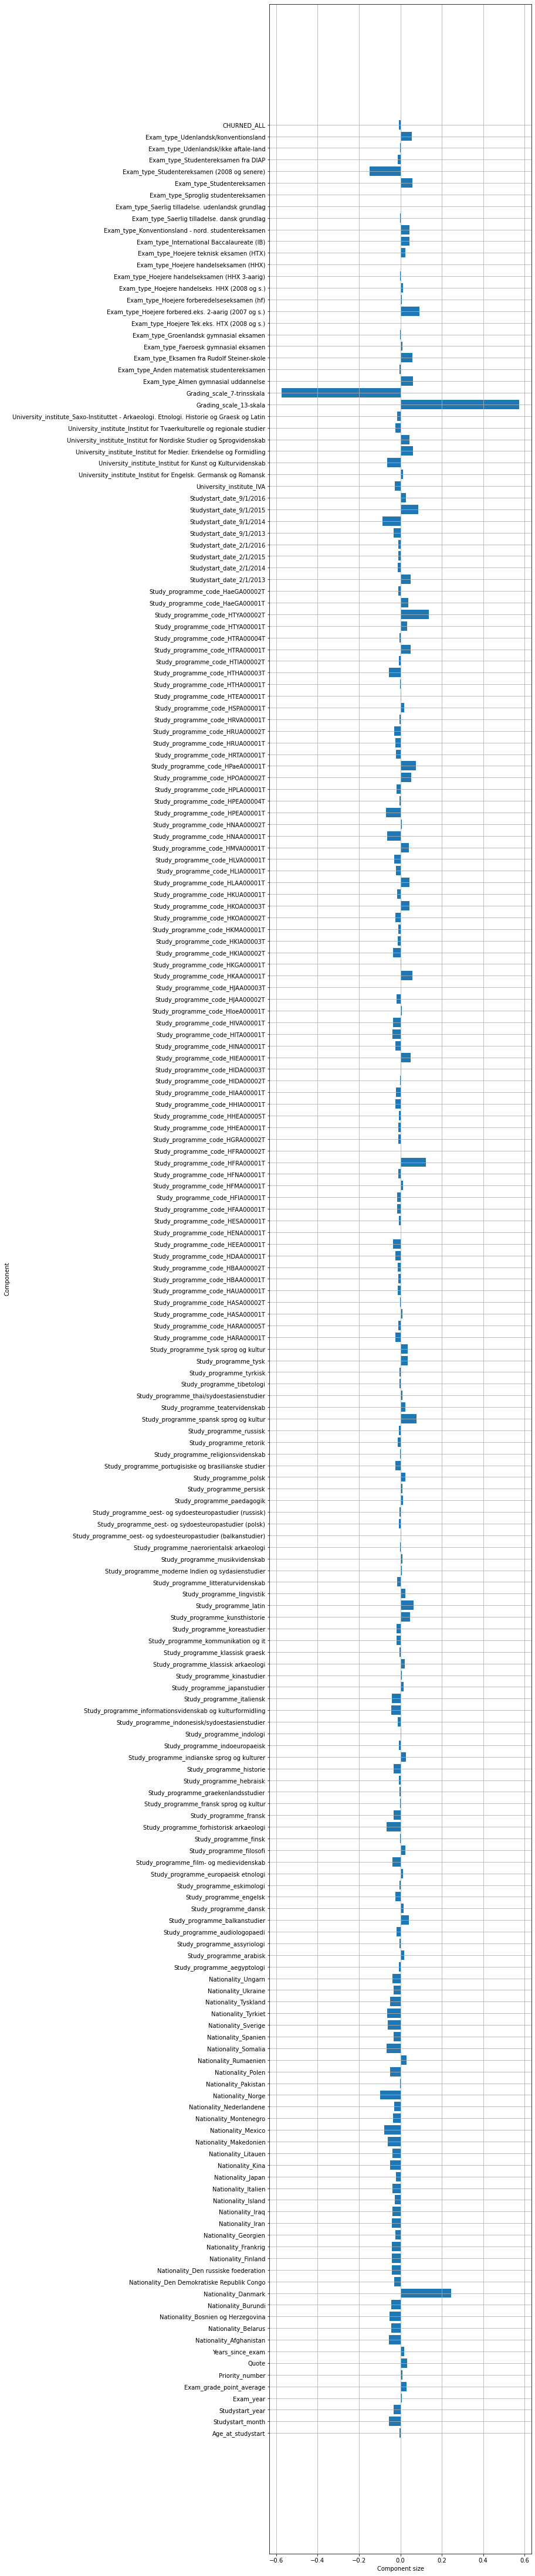

In [81]:
n_features = len(data_copy.columns)
plt.figure(figsize=(8, 80))
plt.barh(range(n_features), pca.components_[0], align='center')
plt.yticks(np.arange(n_features), data_copy.columns)
plt.xlabel("Component size")
plt.ylabel("Component")
plt.grid()

The features that provide most variance are 'Grading_scale_7-trinsskala', 'Grading_scale_13-skala'. There are many features in this dataset and they also contribute, so we would like our model to take them into consideration too. Therefore, we will stick to the default L2.

We would like to scale the data, so that the algorithms that use distances can perform better.

In [82]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
data.loc[:,'Age_at_studystart':'Exam_type_Udenlandsk/konventionsland'] = scaler.fit_transform(data.loc[:,'Age_at_studystart':'Exam_type_Udenlandsk/konventionsland'])

Separating data into training and testing data:

In [83]:
y = data.loc[:,'CHURNED_ALL']
X = data.drop(columns='CHURNED_ALL')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

We use cross validation to find an optimal value for C. LogisticRegressionCV has this functionality built-in, so we will use this model.

In [84]:
model = LogisticRegressionCV(cv=10, random_state=0, max_iter = 4000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(model.get_params())

0.6352395672333848
0.6435185185185185
{'Cs': 10, 'class_weight': None, 'cv': 10, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 4000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}


Other models we can try for this case should be supervised as well. Therefore, we will try KNeighborsClassifier, GaussianNB, and DecisionTreeClassifier.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': range(1,15)}
model = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, return_train_score=True)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(model.get_params())

0.6437403400309119
0.625
{'cv': 10, 'error_score': nan, 'estimator__algorithm': 'auto', 'estimator__leaf_size': 30, 'estimator__metric': 'minkowski', 'estimator__metric_params': None, 'estimator__n_jobs': None, 'estimator__n_neighbors': 5, 'estimator__p': 2, 'estimator__weights': 'uniform', 'estimator': KNeighborsClassifier(), 'n_jobs': None, 'param_grid': {'n_neighbors': range(1, 15)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': None, 'verbose': 0}


In [86]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6313755795981453
0.5092592592592593


In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(2, 10)}
model = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, return_train_score=True)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(model.get_params())

Overview of the scores: 
When using the standard scaler:
Logistic regression:
-on train data: 0.6352395672333848
-on test data: 0.6435185185185185
KNN:
-on train data: 0.6437403400309119
-on test data: 0.625
GaussianNB:
-on train data: 0.6313755795981453
-on test data: 0.5092592592592593
Decision trees:
-on train data: 0.6143740340030912
-on test data: 0.6458333333333334


When using the min max scaler:
Logistic regression:
-on train data: 0.6143740340030912
-on test data: 0.6458333333333334
KNN:
-on train data: 0.6468315301391035
-on test data: 0.6296296296296297
GaussianNB:
-on train data: 0.6561051004636785
-on test data: 0.5300925925925926
Decision trees:
-on train data: 0.6143740340030912
-on test data: 0.6458333333333334

We can see that the highest test scores are for Logistic regression when using the MinMaxScaler and for decision trees (regardless of the scaling). Using Logistic regression with the standard scaler also offers a good accuracy on testing data, while also giving good accuracy on the train data, having the overall best ratio between the two, which is why it would be a more preferred algorithm to use.

The accuracy of the algorithm is not great in any case. This means that the dataset does not have any significant features linked to students that drop out.
This accuracy could not have been too high in any case, since only data prior to admission is used. There are factors during the edication that can have a stronger influence on whether a student drops out or not, so that is most likely a reason why the accuracy cannot go higher, despite the model used.

One way to increase accuracy might be to remove the outliers found in Years_since_exam and Age_at_studystart. This will increase accuracy for the students that an average number in these 2 columns, but it will not be useful for those who don't.